<a href="https://colab.research.google.com/github/Luciana-cloud/DEMENT_toy/blob/main/plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#..Load modules
import os
import sys
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from plotnine import *

 I neeed to upload not only the pickle file, but also the output.py file

In [ ]:
import pprint, pickle

pkl_file = open('/content/drive/MyDrive/results_dement.pkl', 'rb')
data1 = pickle.load(pkl_file)
pkl_file.close()

#**MODEL OUTPUTS**

In [ ]:
from pandas import Series
tt        = np.linspace(0,99,100) # Number of repetitions = 10
time      = np.linspace(0,1095,1096)

**TOTAL RESPIRATION**

In [ ]:
respi     = []

for i in tt:
        respi.append(data1[int(i)].RespSeries)

Respi_mean = (np.array(respi).mean(axis=0))
respiration_5  = np.percentile(respi,5,axis=0)
respiration_95 = np.percentile(respi,95,axis=0)

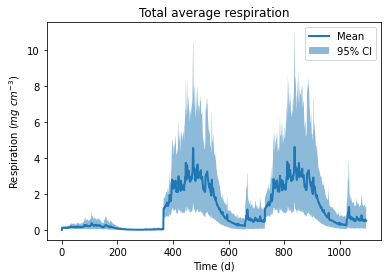

In [ ]:
fig, ax = plt.subplots()

ax.fill_between(time,respiration_5,respiration_95, alpha=.5, linewidth=0,label="95% CI")
ax.plot(time,Respi_mean, linewidth=2,label="Mean")

plt.xlabel('Time (d)') 
plt.ylabel('Respiration ($mg$ $cm^{-3}$)') 
plt.title('Total average respiration') 
ax.legend()
fig.show()

**CUE**

In [ ]:
CUE_tot     = []

for i in tt:
        CUE_tot.append(data1[int(i)].CUE_system)

CUE_mean = (np.array(CUE_tot).mean(axis=0))
CUE_5  = np.percentile(CUE_tot,5,axis=0)
CUE_95 = np.percentile(CUE_tot,95,axis=0)

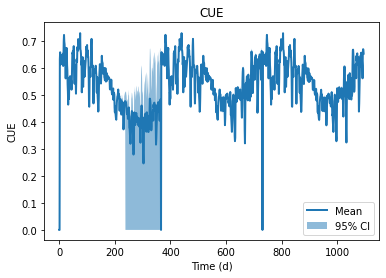

In [ ]:
fig, ax = plt.subplots()

ax.fill_between(time,CUE_5,CUE_95, alpha=.5, linewidth=0,label="95% CI")
ax.plot(time,CUE_mean, linewidth=2,label="Mean")

plt.xlabel('Time (d)') 
plt.ylabel('CUE') 
plt.title('CUE') 
ax.legend()
fig.show()

**TOTAL SUBSTRATE**

Substrate degradation

In [ ]:
Subst_tot = []

for i in tt:
    Subst_tot.append(data1[int(i)].SubstratesSeries)

Sub_sum     = np.mean((np.array(Subst_tot).sum(axis=1)),axis=0)
Sub_05      = np.percentile((np.array(Subst_tot).sum(axis=1)),5,axis=0)
Sub_95      = np.percentile((np.array(Subst_tot).sum(axis=1)),95,axis=0)

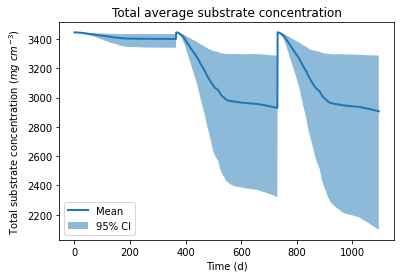

In [ ]:
fig, ax = plt.subplots()

ax.fill_between(time,Sub_05,Sub_95, alpha=.5, linewidth=0,label="95% CI")
ax.plot(time,Sub_sum, linewidth=2,label="Mean")

plt.xlabel('Time (d)') 
plt.ylabel('Total substrate concentration ($mg$ $cm^{-3}$)') 
plt.title('Total average substrate concentration') 
ax.legend(loc="lower left")
fig.show()

Substrate loss

In [ ]:
Total_subs = {} # Total biomass

for i in tt:
  Total_subs["Run"+str(int(i)+1)] = np.sum(Subst_tot[int(i)],axis=0)

In [ ]:
Subs_loss = {} # Total biomass

for i in tt:
    Subs_loss["Run"+str(int(i)+1)] = (Total_subs["Run"+str(int(i)+1)][0]-Total_subs["Run"+str(int(i)+1)])/Total_subs["Run"+str(int(i)+1)]

In [ ]:
Sub_tempo          = list(Subs_loss.values())
Subs_loss_mean     = np.mean(Sub_tempo,axis=0)
Subs_loss_05       = np.percentile(Sub_tempo,5,axis=0)
Subs_loss_95       = np.percentile(Sub_tempo,95,axis=0)

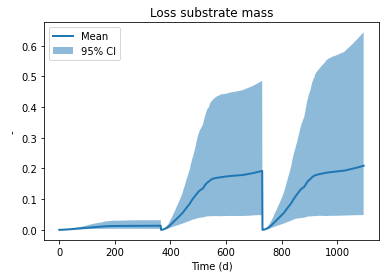

In [ ]:
fig, ax = plt.subplots()

ax.fill_between(time,Subs_loss_05,Subs_loss_95, alpha=.5, linewidth=0,label="95% CI")
ax.plot(time,Subs_loss_mean, linewidth=2,label="Mean")

plt.xlabel('Time (d)') 
plt.ylabel('-') 
plt.title('Loss substrate mass') 
ax.legend(loc="upper left")
fig.show()

Substrate composition in proportions

In [ ]:
DeadMic         = []
DeadEnz         = []
Cellulose       = []
Hemicellulose   = []
Starch          = []
Chitin          = []
Lignin          = []
Protein1        = []
Protein2        = []
Protein3        = []
OrgP1           = []
OrgP2           = []

for i in tt:
  DeadMic.append(Subst_tot[int(i)].T["DeadMic"]/np.sum(Subst_tot[int(i)],axis=0))
  DeadEnz.append(Subst_tot[int(i)].T["DeadEnz"]/np.sum(Subst_tot[int(i)],axis=0))
  Cellulose.append(Subst_tot[int(i)].T["Cellulose"]/np.sum(Subst_tot[int(i)],axis=0))
  Hemicellulose.append(Subst_tot[int(i)].T["Hemicellulose"]/np.sum(Subst_tot[int(i)],axis=0))
  Starch.append(Subst_tot[int(i)].T["Starch"]/np.sum(Subst_tot[int(i)],axis=0))
  Chitin.append(Subst_tot[int(i)].T["Chitin"]/np.sum(Subst_tot[int(i)],axis=0))
  Lignin.append(Subst_tot[int(i)].T["Lignin"]/np.sum(Subst_tot[int(i)],axis=0))
  Protein1.append(Subst_tot[int(i)].T["Protein1"]/np.sum(Subst_tot[int(i)],axis=0))
  Protein2.append(Subst_tot[int(i)].T["Protein2"]/np.sum(Subst_tot[int(i)],axis=0))
  Protein3.append(Subst_tot[int(i)].T["Protein3"]/np.sum(Subst_tot[int(i)],axis=0))
  OrgP1.append(Subst_tot[int(i)].T["OrgP1"]/np.sum(Subst_tot[int(i)],axis=0))
  OrgP2.append(Subst_tot[int(i)].T["OrgP2"]/np.sum(Subst_tot[int(i)],axis=0))

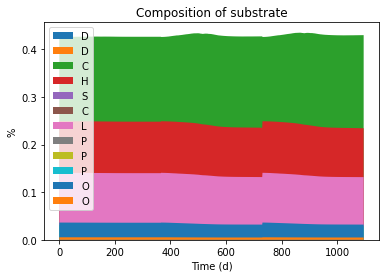

In [ ]:
plt.stackplot(time,np.mean(DeadMic,axis=0),labels="DeadMic")
plt.stackplot(time,np.mean(DeadEnz,axis=0),labels="DeadEnz")
plt.stackplot(time,np.mean(Cellulose,axis=0),labels="Cellulose")
plt.stackplot(time,np.mean(Hemicellulose,axis=0),labels="Hemicellulose")
plt.stackplot(time,np.mean(Starch,axis=0),labels="Starch")
plt.stackplot(time,np.mean(Chitin,axis=0),labels="Chitin")
plt.stackplot(time,np.mean(Lignin,axis=0),labels="Lignin")
plt.stackplot(time,np.mean(Protein1,axis=0),labels="Protein1")
plt.stackplot(time,np.mean(Protein2,axis=0),labels="Protein2")
plt.stackplot(time,np.mean(Protein3,axis=0),labels="Protein3")
plt.stackplot(time,np.mean(OrgP1,axis=0),labels="OrgP1")
plt.stackplot(time,np.mean(OrgP2,axis=0),labels="OrgP2")
plt.xlabel('Time (d)') 
plt.ylabel('%') 
plt.title('Composition of substrate') 
plt.legend(loc="upper left")
plt.show()

Substrate composition in absolute values

In [ ]:
DeadMic         = []
DeadEnz         = []
Cellulose       = []
Hemicellulose   = []
Starch          = []
Chitin          = []
Lignin          = []
Protein1        = []
Protein2        = []
Protein3        = []
OrgP1           = []
OrgP2           = []

for i in tt:
  DeadMic.append(Subst_tot[int(i)].T["DeadMic"])
  DeadEnz.append(Subst_tot[int(i)].T["DeadEnz"])
  Cellulose.append(Subst_tot[int(i)].T["Cellulose"])
  Hemicellulose.append(Subst_tot[int(i)].T["Hemicellulose"])
  Starch.append(Subst_tot[int(i)].T["Starch"])
  Chitin.append(Subst_tot[int(i)].T["Chitin"])
  Lignin.append(Subst_tot[int(i)].T["Lignin"])
  Protein1.append(Subst_tot[int(i)].T["Protein1"])
  Protein2.append(Subst_tot[int(i)].T["Protein2"])
  Protein3.append(Subst_tot[int(i)].T["Protein3"])
  OrgP1.append(Subst_tot[int(i)].T["OrgP1"])
  OrgP2.append(Subst_tot[int(i)].T["OrgP2"])

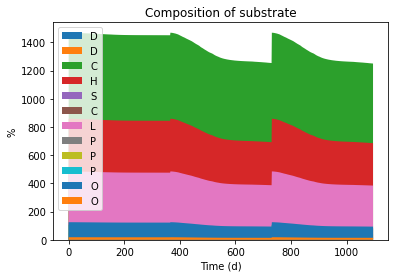

In [ ]:
plt.stackplot(time,np.mean(DeadMic,axis=0),labels="DeadMic")
plt.stackplot(time,np.mean(DeadEnz,axis=0),labels="DeadEnz")
plt.stackplot(time,np.mean(Cellulose,axis=0),labels="Cellulose")
plt.stackplot(time,np.mean(Hemicellulose,axis=0),labels="Hemicellulose")
plt.stackplot(time,np.mean(Starch,axis=0),labels="Starch")
plt.stackplot(time,np.mean(Chitin,axis=0),labels="Chitin")
plt.stackplot(time,np.mean(Lignin,axis=0),labels="Lignin")
plt.stackplot(time,np.mean(Protein1,axis=0),labels="Protein1")
plt.stackplot(time,np.mean(Protein2,axis=0),labels="Protein2")
plt.stackplot(time,np.mean(Protein3,axis=0),labels="Protein3")
plt.stackplot(time,np.mean(OrgP1,axis=0),labels="OrgP1")
plt.stackplot(time,np.mean(OrgP2,axis=0),labels="OrgP2")
plt.xlabel('Time (d)') 
plt.ylabel('%') 
plt.title('Composition of substrate') 
plt.legend(loc="upper left")
plt.show()

**MICROBIAL BIOMASS** 

Total Biomass

In [ ]:
Bioma_tot = []

for i in tt:
    Bioma_tot.append(data1[int(i)].MicrobesSeries)

Bio_sum     = np.mean((np.array(Bioma_tot).sum(axis=1)),axis=0)
Bio_05      = np.percentile((np.array(Bioma_tot).sum(axis=1)),5,axis=0)
Bio_95      = np.percentile((np.array(Bioma_tot).sum(axis=1)),95,axis=0)

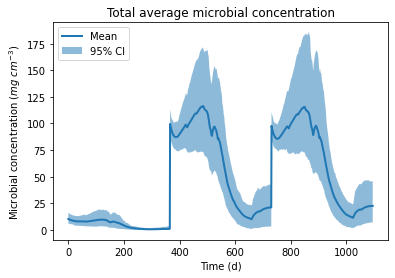

In [ ]:
fig, ax = plt.subplots()

ax.fill_between(time,Bio_05,Bio_95, alpha=.5, linewidth=0,label="95% CI")
ax.plot(time,Bio_sum, linewidth=2,label="Mean")

plt.xlabel('Time (d)') 
plt.ylabel('Microbial concentration ($mg$ $cm^{-3}$)') 
plt.title('Total average microbial concentration') 
ax.legend(loc="upper left")
fig.show()

Total Biomass per Run

In [ ]:
Bioma_taxa = [] # Total biomass

for i in tt:
  Bioma_taxa.append(Bioma_tot[int(i)])

Text(0.5, 1.0, 'Total Microbial Biomass per Run')

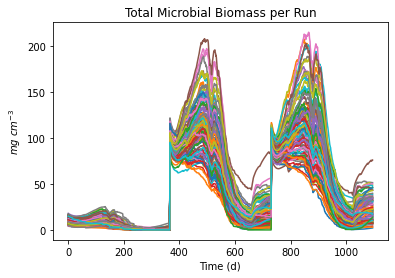

In [ ]:
Bioma_taxa_T = {} # Total biomass

for i in tt:
  Bioma_taxa_T["Run"+str(int(i)+1)] = np.sum(Bioma_taxa[int(i)],axis=0)
  plt.plot(time,Bioma_taxa_T["Run"+str(int(i)+1)],label="Run"+str(int(i)+1))
plt.xlabel('Time (d)') 
plt.ylabel('$mg$ $cm^{-3}$') 
plt.title('Total Microbial Biomass per Run') 

Proportion of biomass degrading specific substrates

In [ ]:
taxa_n        = 10 # Number of taxa (10 taxa, but it can be change to 100)
enzyme_n      = 50 # Number of enzymes
subs_n        = 12 # Number of substrates
m             = np.linspace(0,len(tt)-1,len(tt))  # Number of simulations
m1            = np.linspace(0,(enzyme_n)-1,(enzyme_n))      # Number of enzymes
m2            = np.linspace(0,(taxa_n)-1,(taxa_n))       # Number of taxa (10 taxa, but it can be change to 100) 
m4            = np.linspace(0,(subs_n)-1,(subs_n))      # Number of substrates

*Here, I get the total biomass containing specific enzymes per run. The final file is a dicctionary "Sub_Taxa_R", which has run number and enzyme number*

In [ ]:
Sub_Taxa_R    = {} # Contains biomass degrading specific enzymes for multiple runs

for iii in m:
  enz_taxa      = {} # Contains biomass having specific enzymes for 1 run
  enz_taxa_sum  = {} # Contains biomass having specific enzymes for 1 run
  for ii in m1:
    temp        = []
    for i in m2:
      if data1[int(iii)].Initialization["EnzGenes"][0:len(m2)]["Enz"+str(int(ii)+1)][int(i)]==1:
        temp.append(Bioma_tot[int(iii)].T["Tax"+str(int(i)+1)].tolist())
        enz_taxa["Enz"+str(int(ii)+1)] = temp
      else:
        temp.append(np.zeros(len(time)).tolist())
        enz_taxa["Enz"+str(int(ii)+1)] = temp
    enz_taxa_sum["Enz"+str(int(ii)+1)] = np.sum(enz_taxa["Enz"+str(int(ii)+1)],axis=0)
  Sub_Taxa_R["Run"+str(int(iii)+1)] = enz_taxa_sum

<function matplotlib.pyplot.show>

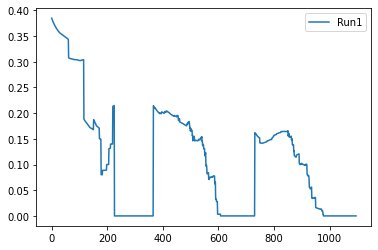

In [ ]:
plt.plot(time,(Sub_Taxa_R["Run1"]["Enz2"]/np.sum(Bioma_tot[0])),label="Run1") # [400:len(time)]
plt.legend()
plt.show

*Here, I have determine the proportions of biomass degrading specific substrates. Because we have some redundancy in taxa that can degrade the same substrate, I calculate the proportions based on the total biomass degrading all the substrates together to account for the redundancies. This information is collected in the output bio_run*

In [ ]:
Sub_Taxa_R['Run1']["Enz1"]

array([ 6.        ,  5.88155872,  5.76850975, ..., 18.55517769,
       18.65237999, 18.7530098 ])

In [ ]:
m3          = np.linspace(0,(subs_n)-1,(subs_n))      # Number of substrates
m           = np.linspace(0,len(tt)-1,len(tt))  # Number of simulations
Sub_Taxa_TR = {}

for iii in m:
  Sub_Taxa_T     = {} # Contains biomass degrading specific enzymes for multiple runs
  Sub_Taxa_sum   = {} # Contains total biomass degrading specific enzymes for multiple runs
  for j in m3:
    temp1=[]
    for ii in m1:
      if data1[int(iii)].Initialization["ReqEnz"][0:12].T["set1"]["Sub"+str(int(j)+1)][(int(ii))] == 1:
        temp1.append(Sub_Taxa_R["Run"+str(int(iii)+1)]["Enz"+str(int(ii)+1)].tolist())
        Sub_Taxa_T["Sub"+str(int(j)+1)] = temp1
      else:
        temp1.append(np.zeros(len(time)).tolist())
        Sub_Taxa_T["Sub"+str(int(j)+1)] = temp1
    Sub_Taxa_sum["Sub"+str(int(j)+1)] = np.sum(Sub_Taxa_T["Sub"+str(int(j)+1)],axis=0)
  Sub_Taxa_TR["Run"+str(int(iii)+1)] = Sub_Taxa_sum

In [ ]:
bio_run = {} # Total Biomass including redundancies

for iii in m:
  tem = []
  for j in m3:
    tem.append(Sub_Taxa_TR["Run"+str(int(iii)+1)]["Sub"+str(int(j)+1)].tolist())
  bio_run["Run"+str(int(iii)+1)] = np.sum(tem,axis=0) 

*Test plot 1*

In [ ]:
m           = np.linspace(0,len(tt)-1,len(tt))  # Number of simulations

DeadMic         = []
DeadEnz         = []
Cellulose       = []
Hemicellulose   = []
Starch          = []
Chitin          = []
Lignin          = []
Protein1        = []
Protein2        = []
Protein3        = []
OrgP1           = []
OrgP2           = []

for i in m:
  DeadMic.append(Sub_Taxa_TR["Run"+str(int(i)+1)]["Sub"+str(int(0)+1)]/bio_run["Run"+str(int(i)+1)])
  DeadEnz.append(Sub_Taxa_TR["Run"+str(int(i)+1)]["Sub"+str(int(1)+1)]/bio_run["Run"+str(int(i)+1)])
  Cellulose.append(Sub_Taxa_TR["Run"+str(int(i)+1)]["Sub"+str(int(2)+1)]/bio_run["Run"+str(int(i)+1)])
  Hemicellulose.append(Sub_Taxa_TR["Run"+str(int(i)+1)]["Sub"+str(int(3)+1)]/bio_run["Run"+str(int(i)+1)])
  Starch.append(Sub_Taxa_TR["Run"+str(int(i)+1)]["Sub"+str(int(4)+1)]/bio_run["Run"+str(int(i)+1)])
  Chitin.append(Sub_Taxa_TR["Run"+str(int(i)+1)]["Sub"+str(int(5)+1)]/bio_run["Run"+str(int(i)+1)])
  Lignin.append(Sub_Taxa_TR["Run"+str(int(i)+1)]["Sub"+str(int(6)+1)]/bio_run["Run"+str(int(i)+1)])
  Protein1.append(Sub_Taxa_TR["Run"+str(int(i)+1)]["Sub"+str(int(7)+1)]/bio_run["Run"+str(int(i)+1)])
  Protein2.append(Sub_Taxa_TR["Run"+str(int(i)+1)]["Sub"+str(int(8)+1)]/bio_run["Run"+str(int(i)+1)])
  Protein3.append(Sub_Taxa_TR["Run"+str(int(i)+1)]["Sub"+str(int(9)+1)]/bio_run["Run"+str(int(i)+1)])
  OrgP1.append(Sub_Taxa_TR["Run"+str(int(i)+1)]["Sub"+str(int(10)+1)]/bio_run["Run"+str(int(i)+1)])
  OrgP2.append(Sub_Taxa_TR["Run"+str(int(i)+1)]["Sub"+str(int(11)+1)]/bio_run["Run"+str(int(i)+1)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7

<function matplotlib.pyplot.show>

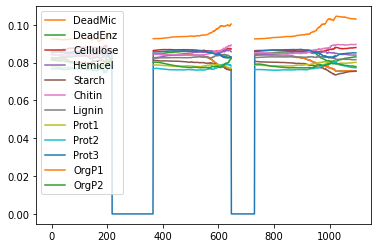

In [ ]:
plt.plot(time,np.nan_to_num(np.mean(DeadMic,axis=0)))
plt.plot(time,np.mean(DeadMic,axis=0),label="DeadMic")
plt.plot(time,np.mean(DeadEnz,axis=0),label="DeadEnz")
plt.plot(time,np.mean(Cellulose,axis=0),label="Cellulose")
plt.plot(time,np.mean(Hemicellulose,axis=0),label="Hemicel")
plt.plot(time,np.mean(Starch,axis=0),label="Starch")
plt.plot(time,np.mean(Chitin,axis=0),label="Chitin")
plt.plot(time,np.mean(Lignin,axis=0),label="Lignin")
plt.plot(time,np.mean(Protein1,axis=0),label="Prot1")
plt.plot(time,np.mean(Protein2,axis=0),label="Prot2")
plt.plot(time,np.mean(Protein3,axis=0),label="Prot3")
plt.plot(time,np.mean(OrgP1,axis=0),label="OrgP1")
plt.plot(time,np.mean(OrgP2,axis=0),label="OrgP2")
plt.legend()
plt.show

*Test plot 2*

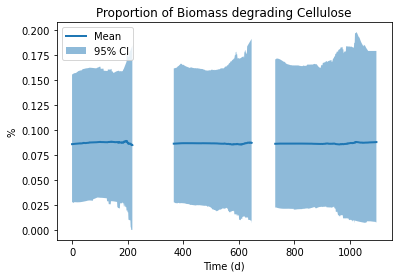

In [ ]:
fig, ax = plt.subplots()

ax.fill_between(time,np.percentile(Cellulose,5,axis=0),np.percentile(Cellulose,95,axis=0), alpha=.5, linewidth=0,label="95% CI")
ax.plot(time,np.mean(Cellulose,axis=0), linewidth=2,label="Mean")

plt.xlabel('Time (d)') 
plt.ylabel('%') 
plt.title('Proportion of Biomass degrading Cellulose') 
ax.legend(loc="upper left")
fig.show()

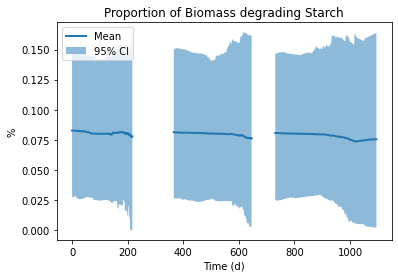

In [ ]:
fig, ax = plt.subplots()

ax.fill_between(time,np.percentile(Starch,5,axis=0),np.percentile(Starch,95,axis=0), alpha=.5, linewidth=0,label="95% CI")
ax.plot(time,np.mean(Starch,axis=0), linewidth=2,label="Mean")

plt.xlabel('Time (d)') 
plt.ylabel('%') 
plt.title('Proportion of Biomass degrading Starch') 
ax.legend(loc="upper left")
fig.show()

#**MODEL PARAMETERS**

*Cost of constituitive enzyme production = EnzProdConsti_trait*

In [ ]:
m             = np.linspace(0,len(tt)-1,len(tt))  # Number of simulations
m2            = np.linspace(0,(taxa_n)-1,(taxa_n))       # Number of taxa (10 taxa, but it can be change to 100) 
Enzcon  = {}
EnzconD = {}

for j in m:
    temp   = []
    for i in m2:
        temp.append(data1[int(int(j))].Initialization["EnzProdConsti_trait"][0:taxa_n][int(i)]*(Bioma_tot[int(j)][1095]/Bioma_taxa_T["Run"+str(int(j)+1)][1095])[int(i)])
    Enzcon["Run"+str(int(j)+1)] = np.sum(temp)
    EnzconD["Run"+str(int(j)+1)] = temp

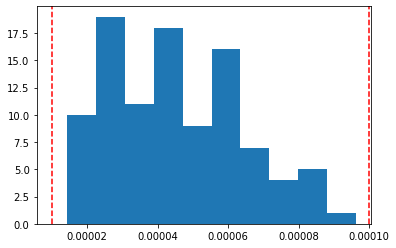

In [ ]:
plt.hist(Enzcon.values())
plt.axvline(x=0.00001,color='r', linestyle='--')
plt.axvline(x=0.0001,color='r', linestyle='--')

*Cost of inducible enzyme production = EnzProdInduci_trait*

In [ ]:
m             = np.linspace(0,len(tt)-1,len(tt))  # Number of simulations
m2            = np.linspace(0,(taxa_n)-1,(taxa_n))       # Number of taxa (10 taxa, but it can be change to 100) 
Enzind  = {}

for j in m:
    temp   = []
    for i in m2:
        temp.append(data1[int(int(j))].Initialization["EnzProdInduci_trait"][0:taxa_n][int(i)]*(Bioma_tot[int(j)][1095]/Bioma_taxa_T["Run"+str(int(j)+1)][1095])[int(i)])
    Enzind["Run"+str(int(j)+1)] = np.sum(temp)


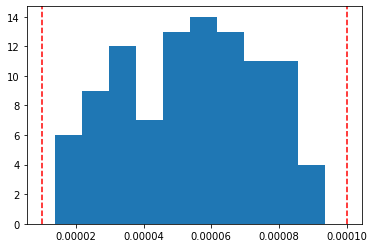

In [ ]:
plt.hist(Enzind.values())
plt.axvline(x=0.00001,color='r', linestyle='--')
plt.axvline(x=0.0001,color='r', linestyle='--')

*Cost of constituitive osmolyte production = OsmoProdConsti_trait*

In [ ]:
m             = np.linspace(0,len(tt)-1,len(tt))  # Number of simulations
m2            = np.linspace(0,(taxa_n)-1,(taxa_n))       # Number of taxa (10 taxa, but it can be change to 100) 
oscons = {}

for j in m:
    temp   = []
    for i in m2:
        temp.append(data1[int(int(j))].Initialization["OsmoProdConsti_trait"][0:taxa_n][int(i)]*(Bioma_tot[int(j)][1095]/Bioma_taxa_T["Run"+str(int(j)+1)][1095])[int(i)])
    oscons["Run"+str(int(j)+1)] = np.sum(temp)

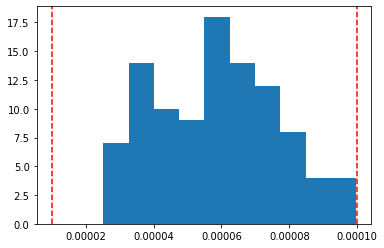

In [ ]:
plt.hist(oscons.values())
plt.axvline(x=0.00001,color='r', linestyle='--')
plt.axvline(x=0.0001,color='r', linestyle='--')

*Cost of inducible osmolyte production = OsmoProdInduci_trait*

In [ ]:
m             = np.linspace(0,len(tt)-1,len(tt))  # Number of simulations
m2            = np.linspace(0,(taxa_n)-1,(taxa_n))       # Number of taxa (10 taxa, but it can be change to 100) 
osindu = {}

for j in m:
    temp   = []
    for i in m2:
        temp.append(data1[int(int(j))].Initialization["OsmoProdInduci_trait"][0:taxa_n][int(i)]*(Bioma_tot[int(j)][1095]/Bioma_taxa_T["Run"+str(int(j)+1)][1095])[int(i)])
    osindu["Run"+str(int(j)+1)] = np.sum(temp)

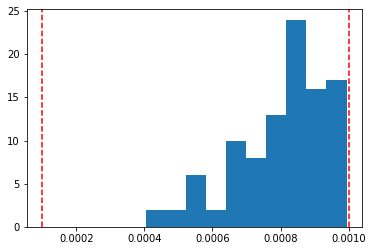

In [ ]:
plt.hist(osindu.values())
plt.axvline(x=0.0001,color='r', linestyle='--')
plt.axvline(x=0.001,color='r', linestyle='--')

*Drought Tolerance per taxa = TaxDroughtTol*

In [ ]:
m             = np.linspace(0,len(tt)-1,len(tt))  # Number of simulations
m2            = np.linspace(0,(taxa_n)-1,(taxa_n))       # Number of taxa (10 taxa, but it can be change to 100) 
taxdrot = {}

for j in m:
    temp   = []
    for i in m2:
        temp.append(data1[int(int(j))].Initialization["TaxDroughtTol"][0:taxa_n][int(i)]*(Bioma_tot[int(j)][1095]/Bioma_taxa_T["Run"+str(int(j)+1)][1095])[int(i)])
    taxdrot["Run"+str(int(j)+1)] = np.sum(temp)

(array([ 4.,  1.,  6.,  3.,  6.,  8., 14., 15., 17., 26.]),
 array([0.37599474, 0.43839526, 0.5007958 , 0.5631963 , 0.6255968 ,
        0.68799734, 0.7503979 , 0.81279844, 0.87519896, 0.9375995 ,
        1.        ], dtype=float32),
 <a list of 10 Patch objects>)

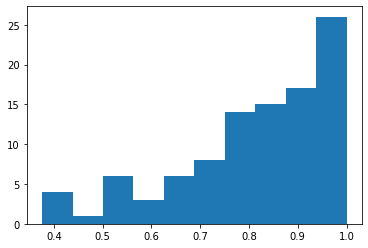

In [ ]:
plt.hist(taxdrot.values())
#plt.axvline(x=0.0001,color='r', linestyle='--')
#plt.axvline(x=0.001,color='r', linestyle='--')

*Cost for transporter production = UptakeGenes_trait*

In [ ]:
m             = np.linspace(0,len(tt)-1,len(tt))  # Number of simulations
m2            = np.linspace(0,(taxa_n)-1,(taxa_n))       # Number of taxa (10 taxa, but it can be change to 100) 
taxtran = {}

for j in m:
    temp   = []
    for i in m2:
        temp.append(data1[int(int(j))].Initialization["UptakeGenes_trait"][0:taxa_n][int(i)]*(Bioma_tot[int(j)][1095]/Bioma_taxa_T["Run"+str(int(j)+1)][1095])[int(i)])
    taxtran["Run"+str(int(j)+1)] = np.sum(temp)

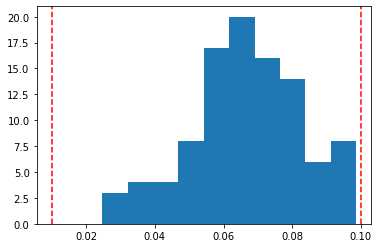

In [ ]:
plt.hist(taxtran.values())
plt.axvline(x=0.01,color='r', linestyle='--')
plt.axvline(x=0.1,color='r', linestyle='--')

*Enzyme-related parameters*

Vmax

In [ ]:
m             = np.linspace(0,len(tt)-1,len(tt))  # Number of simulations
m1            = np.linspace(0,(enzyme_n)-1,(enzyme_n))      # Number of enzymes
m2            = np.linspace(0,(taxa_n)-1,(taxa_n))       # Number of taxa (10 taxa, but it can be change to 100)
m4            = np.linspace(0,(subs_n)-1,(subs_n))      # Number of substrates
enz_Taxa_PR   = {} # Contains biomass degrading specific enzymes for multiple runs

for iii in m:
  enz_taxa      = {} # Contains proportion having specific taxa per enzyme for 1 run ***.tolist()
  for ii in m1:
    temp        = []
    for i in m2:
      if data1[int(iii)].Initialization["EnzGenes"][0:len(m2)]["Enz"+str(int(ii)+1)][int(i)]==1:
        temp.append((Bioma_tot[int(iii)][1095]/Bioma_taxa_T["Run"+str(int(iii)+1)][1095])[int(i)])
        enz_taxa["Enz"+str(int(ii)+1)] = temp
      else:
        temp.append(0)
        enz_taxa["Enz"+str(int(ii)+1)] = temp
  enz_Taxa_PR["Run"+str(int(iii)+1)] = enz_taxa

In [ ]:
data1[int(iii)].Initialization["Vmax0"][0:enzyme_n][j]["Enz"+str(int(ii)+1)]

27.282124

In [ ]:
m             = np.linspace(0,len(tt)-1,len(tt))  # Number of simulations
m1            = np.linspace(0,(enzyme_n)-1,(enzyme_n))      # Number of enzymes
m2            = np.linspace(0,(taxa_n)-1,(taxa_n))       # Number of taxa (10 taxa, but it can be change to 100)
m4            = ["DeadMic","DeadEnz","Cellulose","Hemicellulose",
                 "Starch","Chitin","Lignin","Protein1","Protein2",
                 "Protein3","OrgP1","OrgP2"]      # Number of substrates

vmax0_total_R = {}

for iii in m:
  temp_sub = {}
  for j in m4:
    vmax0_Dead_E  = {}
    for ii in m1:
      temp = {}
      temp_sum = []
      for i in m2:
        temp["Taxa"+str(int(i)+1)] = (data1[int(iii)].Initialization["Vmax0"][0:enzyme_n][j]["Enz"+str(int(ii)+1)]*enz_Taxa_PR["Run"+str(int(iii)+1)]["Enz"+str(int(ii)+1)][(int(i))])
        temp_sum.append((data1[int(iii)].Initialization["Vmax0"][0:enzyme_n][j]["Enz"+str(int(ii)+1)]*enz_Taxa_PR["Run"+str(int(iii)+1)]["Enz"+str(int(ii)+1)][(int(i))]))
      vmax0_Dead_E["Enz"+str(int(ii)+1)] = np.sum(temp_sum)/np.sum(enz_Taxa_PR["Run"+str(int(iii)+1)]["Enz"+str(int(ii)+1)])
    temp_sub[j] = vmax0_Dead_E
  vmax0_total_R["Run"+str(int(iii)+1)] = temp_sub

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


*Plotting histogram*

In [ ]:
m             = np.linspace(0,len(tt)-1,len(tt))  # Number of simulations
m1            = np.linspace(0,(enzyme_n)-1,(enzyme_n))      # Number of enzymes
m4            = ["DeadMic","DeadEnz","Cellulose","Hemicellulose",
                 "Starch","Chitin","Lignin","Protein1","Protein2",
                 "Protein3","OrgP1","OrgP2"]      # Number of substrates

vmax0_plot = []

for iii in m:
  for j in m4:
    for ii in m1:
      vmax0_plot.append(vmax0_total_R["Run"+str(int(iii)+1)][j]["Enz"+str(int(ii)+1)])

vmax0_plot_nonan = [x for x in vmax0_plot if ~np.isnan(x)]

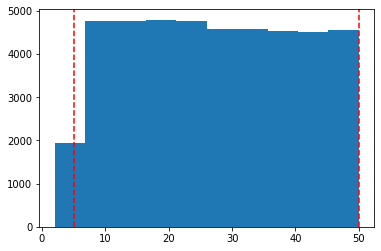

In [ ]:
plt.hist(vmax0_plot_nonan)
plt.axvline(x=5,color='r', linestyle='--')
plt.axvline(x=50,color='r', linestyle='--')

In [ ]:
m             = np.linspace(0,len(tt)-1,len(tt))  # Number of simulations
m1            = np.linspace(0,(enzyme_n)-1,(enzyme_n))      # Number of enzymes
m4            = ["DeadMic","DeadEnz","Cellulose","Hemicellulose",
                 "Starch","Chitin","Lignin","Protein1","Protein2",
                 "Protein3","OrgP1","OrgP2"]      # Number of substrates

vmax0_plot_cellu = []
vmax0_plot_hemi  = []
vmax0_plot_starc = []
vmax0_plot_chiti = []
vmax0_plot_ligni = []

for iii in m:
    for ii in m1:
        vmax0_plot_cellu.append(vmax0_total_R['Run1']["Cellulose"]["Enz"+str(int(ii)+1)])
        vmax0_plot_hemi.append(vmax0_total_R['Run1']["Hemicellulose"]["Enz"+str(int(ii)+1)])
        vmax0_plot_starc.append(vmax0_total_R['Run1']["Starch"]["Enz"+str(int(ii)+1)])
        vmax0_plot_chiti.append(vmax0_total_R['Run1']["Chitin"]["Enz"+str(int(ii)+1)])
        vmax0_plot_ligni.append(vmax0_total_R['Run1']["Lignin"]["Enz"+str(int(ii)+1)])

In [ ]:
vmax0_plot_cellu_nonan = [x for x in vmax0_plot_cellu if ~np.isnan(x)]
vmax0_plot_hemi_nonan = [x for x in vmax0_plot_hemi if ~np.isnan(x)]
vmax0_plot_starc_nonan = [x for x in vmax0_plot_starc if ~np.isnan(x)]
vmax0_plot_chiti_nonan = [x for x in vmax0_plot_chiti if ~np.isnan(x)]
vmax0_plot_ligni_nonan = [x for x in vmax0_plot_ligni if ~np.isnan(x)]

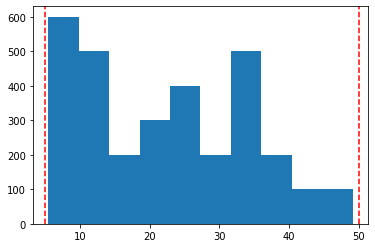

In [ ]:
plt.hist(vmax0_plot_cellu_nonan)
plt.axvline(x=5,color='r', linestyle='--')
plt.axvline(x=50,color='r', linestyle='--')

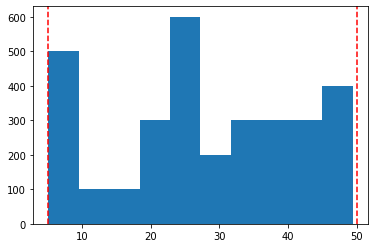

In [ ]:
plt.hist(vmax0_plot_hemi_nonan)
plt.axvline(x=5,color='r', linestyle='--')
plt.axvline(x=50,color='r', linestyle='--')

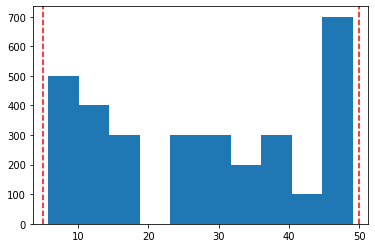

In [ ]:
plt.hist(vmax0_plot_starc_nonan)
plt.axvline(x=5,color='r', linestyle='--')
plt.axvline(x=50,color='r', linestyle='--')

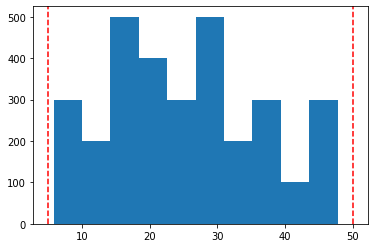

In [ ]:
plt.hist(vmax0_plot_chiti_nonan)
plt.axvline(x=5,color='r', linestyle='--')
plt.axvline(x=50,color='r', linestyle='--')

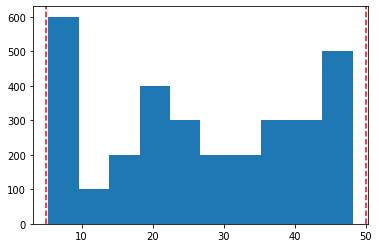

In [ ]:
plt.hist(vmax0_plot_ligni_nonan)
plt.axvline(x=5,color='r', linestyle='--')
plt.axvline(x=50,color='r', linestyle='--')

*Uptake related parameters*

Uptake_Vmax0

In [ ]:
m             = np.linspace(0,len(tt)-1,len(tt))  # Number of simulations
m1            = ["Mon13","Mon14","Mon1","Mon2","Mon3","Mon4",
                 "Mon5","Mon6","Mon7","Mon8","Mon9",
                 "Mon10","Mon11","Mon12"]      # Number of monomers
m2            = np.linspace(0,(taxa_n)-1,(taxa_n))       # Number of taxa (10 taxa, but it can be change to 100)

upt_Taxa_PR   = {} # Contains biomass degrading specific enzymes for multiple runs

for iii in m:
  enz_taxa      = {} # Contains proportion having specific taxa per enzyme for 1 run ***.tolist()
  for ii in m1:
    temp        = []
    for i in m2:
      if data1[int(iii)].Initialization["UptakeGenes"][0:len(m2)].rename(columns={'NH4':'Mon13','PO4':'Mon14','DeadMic':'Mon1','DeadEnz':'Mon2'})[ii][int(i)]==1:
        temp.append((Bioma_tot[int(iii)][1095]/Bioma_taxa_T["Run"+str(int(iii)+1)][1095])[int(i)])
        enz_taxa[ii] = temp
      else:
        temp.append(0)
        enz_taxa[ii] = temp
  upt_Taxa_PR["Run"+str(int(iii)+1)] = enz_taxa

In [ ]:
m             = np.linspace(0,len(tt)-1,len(tt))  # Number of simulations
m1            = ["Mon13","Mon14","Mon1","Mon2","Mon3","Mon4",
                 "Mon5","Mon6","Mon7","Mon8","Mon9",
                 "Mon10","Mon11","Mon12"]      # Number of monomers
m2            = np.linspace(0,(taxa_n)-1,(taxa_n))       # Number of taxa (10 taxa, but it can be change to 100)
m4            = ["Upt1","Upt2","Upt3","Upt4",
                 "Upt5","Upt6","Upt7","Upt8","Upt9",
                 "Upt10","Upt11","Upt12","Upt13","Upt14"]      # Number of transporters

mon_n        = 14 # Number of substrates

Vmax0_uptake_R = {}

for iii in m:
  temp_sub = {}
  for j in m4:
    vmax0_Dead_E  = {}
    for ii in m1:
      temp = {}
      temp_sum = []
      for i in m2:
        temp["Taxa"+str(int(i)+1)] = (data1[int(iii)].Initialization["Uptake_Vmax0"][0:mon_n][j][ii]*upt_Taxa_PR["Run"+str(int(iii)+1)][ii][(int(i))])
        temp_sum.append((data1[int(iii)].Initialization["Uptake_Vmax0"][0:mon_n][j][ii]*upt_Taxa_PR["Run"+str(int(iii)+1)][ii][(int(i))]))
      vmax0_Dead_E[ii] = np.sum(temp_sum)/np.sum(upt_Taxa_PR["Run"+str(int(iii)+1)][ii])
    temp_sub[j] = vmax0_Dead_E
  Vmax0_uptake_R["Run"+str(int(iii)+1)] = temp_sub

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


*Plotting histogram*

In [ ]:
m             = np.linspace(0,len(tt)-1,len(tt))  # Number of simulations
m1            = ["Mon13","Mon14","Mon1","Mon2","Mon3","Mon4",
                 "Mon5","Mon6","Mon7","Mon8","Mon9",
                 "Mon10","Mon11","Mon12"]      # Number of monomers
m4            = ["Upt1","Upt2","Upt3","Upt4",
                 "Upt5","Upt6","Upt7","Upt8","Upt9",
                 "Upt10","Upt11","Upt12","Upt13","Upt14"]      # Number of transporters

vmax0_uptake_R_plot = []

for iii in m:
  for j in m4:
    for ii in m1:
      vmax0_uptake_R_plot.append(Vmax0_uptake_R["Run"+str(int(iii)+1)][j][ii])

vmax0_uptake_R_nonan = [x for x in vmax0_uptake_R_plot if ~np.isnan(x)]

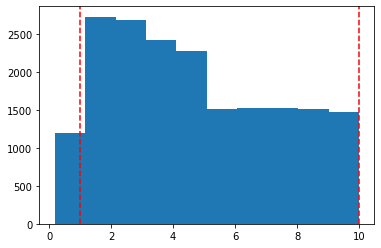

In [ ]:
plt.hist(vmax0_uptake_R_nonan)
plt.axvline(x=1,color='r', linestyle='--')
plt.axvline(x=10,color='r', linestyle='--')